In [28]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

In [29]:
%matplotlib inline

In [30]:
%cd /Users/ckuhn/Documents/ABOVE/Data/Landsat8/TOA
NDCI_raw = pd.read_csv('NDCI_TOA.csv', low_memory=False)
rgb_raw = pd.read_csv('RGB_TOA.csv', low_memory=False)
blueGreen_raw = pd.read_csv('BG_TOA.csv', low_memory=False)
nirSWIR_raw = pd.read_csv('nirSWIR_TOA.csv', low_memory=False)

/Users/ckuhn/Documents/ABOVE/Data/Landsat8/TOA


In [31]:
NDCI_raw.head(2)

,system:time_start,Lake_1-46-3,Abraham Lake,Greenpepper Lake,Sands of Time,Boot Lake,Canvasback Lake,YF04,Scoter Lake,YF03,...,West Crazy Lake,YF20,YF08,YF14,Thumb Lake,Twelvemile Lake,Twin Lake,Shack Lake,YF02,Buddy Lake
0,"Jun 15, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.019,...,NaN,-0.021,-0.018,NaN,NaN,-0.017,NaN,NaN,NaN,-0.013
1,"Jun 17, 2016",-0.024,-0.022,-0.021,NaN,-0.035,-0.043,-0.035,-0.035,-0.051,...,NaN,-0.065,-0.039,-0.024,-0.043,-0.039,-0.002,0.003,-0.051,0.030


In [32]:
df = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

In [33]:
df.head(1)

,system:time_start,Lake,Reflectance
0,"Jun 15, 2016",Lake_1-46-3,NaN


In [34]:
df.tail(2)

,system:time_start,Lake,Reflectance
1486,"Oct 14, 2016",Buddy Lake,NaN
1487,"Oct 14, 2016",Buddy Lake,NaN


### Resample the dataframe to every month

In [35]:
df2 = df.set_index(pd.DatetimeIndex(df['system:time_start']))
df2 = df2.resample("M").median()

df2 = df2.reset_index()
df2
# unset the index

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html

,system:time_start,Reflectance
0,2016-06-30,-0.017
1,2016-07-31,0.022
2,2016-08-31,0.028
3,2016-09-30,0.025
4,2016-10-31,0.014


In [36]:
#remelt that shit
df3 = pd.melt(df2, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

#### Change the shape of the dataframe for plotting

/Users/ckuhn/Documents/ABOVE/Figures


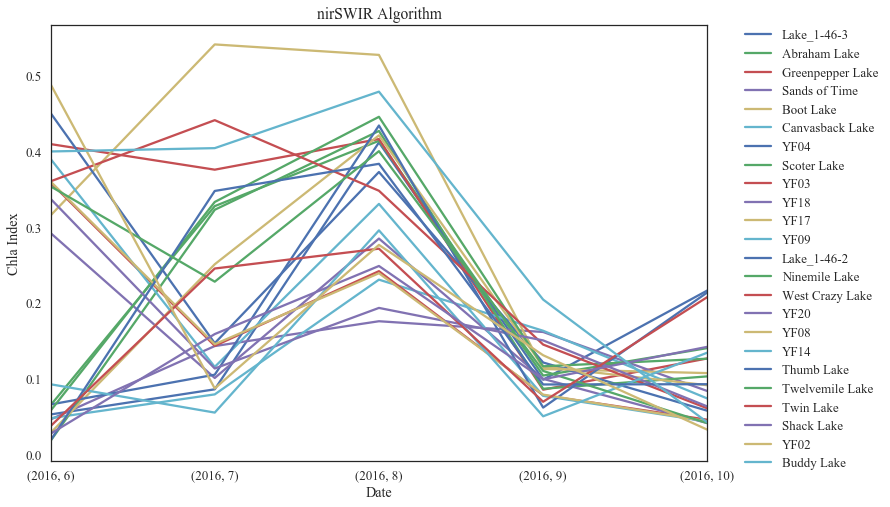

In [37]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

nirSWIR_df = nirSWIR_raw.set_index(pd.DatetimeIndex(nirSWIR_raw['system:time_start']))
nirSWIR  = nirSWIR_df.groupby([(nirSWIR_df.index.year),(nirSWIR_df.index.month)]).mean()
nirSWIR.plot() ## Can change to kind = 'bar' 
plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('nirSWIR Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_nirSWIR_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


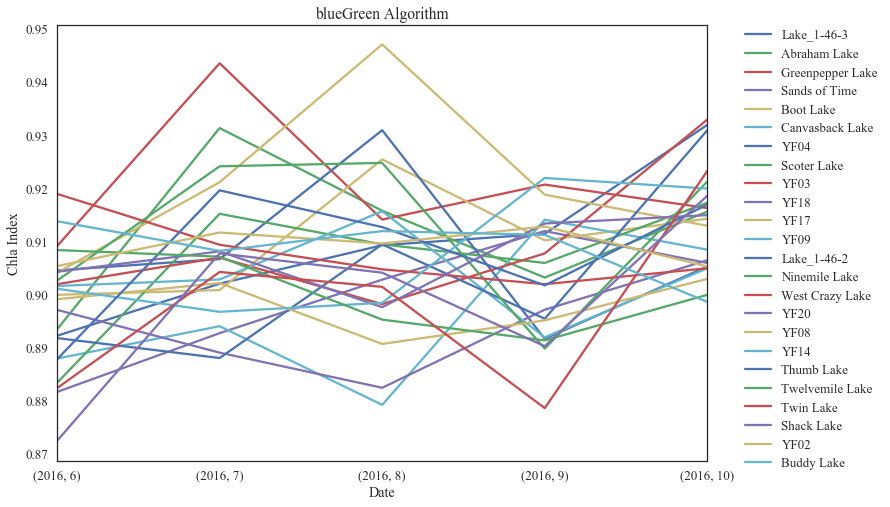

In [38]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

bG_df = blueGreen_raw.set_index(pd.DatetimeIndex(blueGreen_raw['system:time_start']))
bG  = bG_df.groupby([(bG_df.index.year),(bG_df.index.month)]).mean()
bG.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('blueGreen Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_blueGreen_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


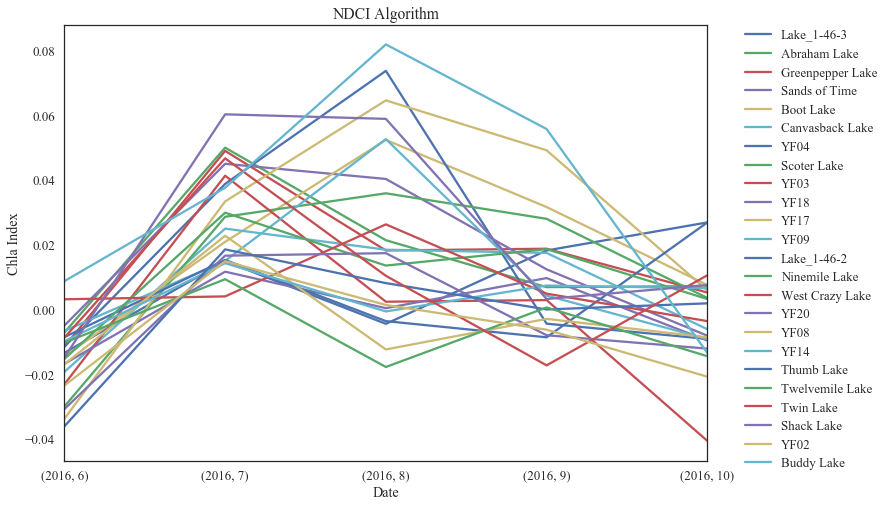

In [39]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

NDCI_df = NDCI_raw.set_index(pd.DatetimeIndex(NDCI_raw['system:time_start']))
NDCI  = NDCI_df.groupby([(NDCI_df.index.year),(NDCI_df.index.month)]).mean()
NDCI.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('NDCI Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_NDCI_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


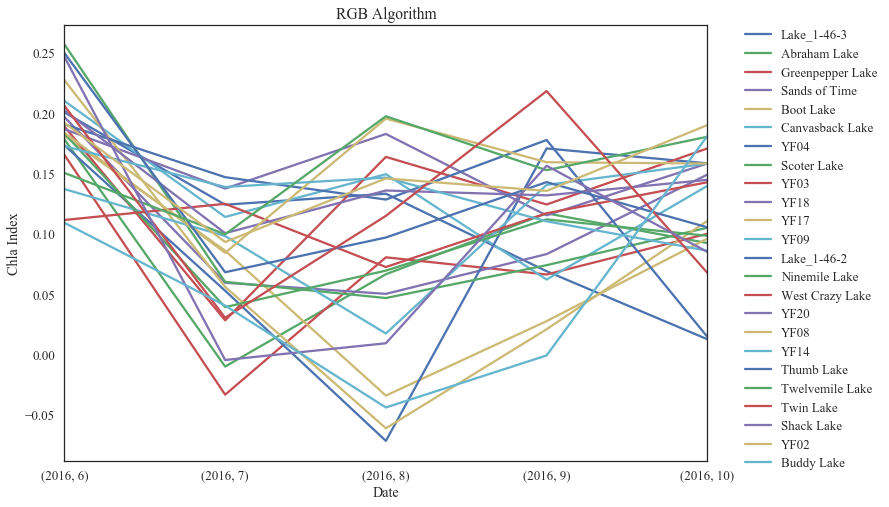

In [40]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

rgb_df = rgb_raw.set_index(pd.DatetimeIndex(rgb_raw['system:time_start']))
RGB  = rgb_df.groupby([(rgb_df.index.year),(rgb_df.index.month)]).mean()
RGB.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('RGB Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_rgb_bar.png', dpi = 300)

### Monthly Averages Per Algorithms

In [41]:
# Melt them all 
df1 = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df2 = pd.melt(rgb_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df3 = pd.melt(nirSWIR_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df4 = pd.melt(blueGreen_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

df4.head(1)

,system:time_start,Lake,Reflectance
0,"Jun 15, 2016",Lake_1-46-3,NaN


In [42]:
# Add column with categorical
df1['Algorithm'] = 'NDCI'
df2['Algorithm'] = 'RGB'
df3['Algorithm'] = 'nirSWIR'
df4['Algorithm'] = 'blueGreen'

In [43]:
df3.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 15, 2016",Lake_1-46-3,NaN,nirSWIR


In [44]:
df1['Reflectance'].min()

-0.085999999999999993

In [45]:
# Concatenate
boss = df1.append(df2).append(df3).append(df4)

In [46]:
print(boss.shape)
boss.head(1)

(5952, 4)


,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 15, 2016",Lake_1-46-3,NaN,NDCI


In [47]:
# Now resample to the month

boss0 = boss.set_index(pd.DatetimeIndex(boss['system:time_start']))
boss1 = boss0.resample("M").median()

boss2 = boss1.reset_index()
boss.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 15, 2016",Lake_1-46-3,NaN,NDCI


In [48]:
#boss.groupby(['system:time_start', 'Algorithm']).mean()#.plot(kind = 'bar')
bossx = boss0.dropna()
grouper = bossx.groupby([pd.TimeGrouper('1M'), 'Algorithm'])
grouper['Algorithm'].count()

system:time_start  Algorithm
2016-06-30         NDCI         148
                   RGB          148
                   blueGreen    148
                   nirSWIR      148
2016-07-31         NDCI         241
                   RGB          241
                   blueGreen    241
                   nirSWIR      241
2016-08-31         NDCI         142
                   RGB          142
                   blueGreen    142
                   nirSWIR      142
2016-09-30         NDCI         159
                   RGB          159
                   blueGreen    159
                   nirSWIR      159
2016-10-31         NDCI          62
                   RGB           62
                   blueGreen     62
                   nirSWIR       62
Name: Algorithm, dtype: int64

In [49]:
result = grouper['Reflectance'].mean().unstack('Algorithm')
result
#https://stackoverflow.com/questions/32012012/pandas-resample-timeseries-with-groupby

Algorithm,NDCI,RGB,blueGreen,nirSWIR
system:time_start,,,,
2016-06-30,-0.014764,0.189209,0.897115,0.200331
2016-07-31,0.027938,0.071871,0.908432,0.220008
2016-08-31,0.024451,0.079127,0.908803,0.349345
2016-09-30,0.011157,0.109541,0.904075,0.110088
2016-10-31,-0.001468,0.121355,0.913581,0.099081


In [50]:
stderr = grouper['Reflectance'].std().unstack('Algorithm')
stderr

Algorithm,NDCI,RGB,blueGreen,nirSWIR
system:time_start,,,,
2016-06-30,0.028716,0.129214,0.037684,0.562026
2016-07-31,0.058327,0.203921,0.045662,0.414224
2016-08-31,0.053150,0.177529,0.036995,0.461177
2016-09-30,0.039440,0.141542,0.029070,0.156464
2016-10-31,0.027782,0.103818,0.019504,0.090909


In [51]:
stderr = grouper['Reflectance'].min().unstack('Algorithm')
stderr

Algorithm,NDCI,RGB,blueGreen,nirSWIR
system:time_start,,,,
2016-06-30,-0.074,-0.149,0.827,-0.019
2016-07-31,-0.086,-0.369,0.820,-0.005
2016-08-31,-0.060,-0.269,0.841,0.000
2016-09-30,-0.070,-0.164,0.856,-0.024
2016-10-31,-0.078,-0.010,0.886,0.004


/Users/ckuhn/Documents/ABOVE/Figures


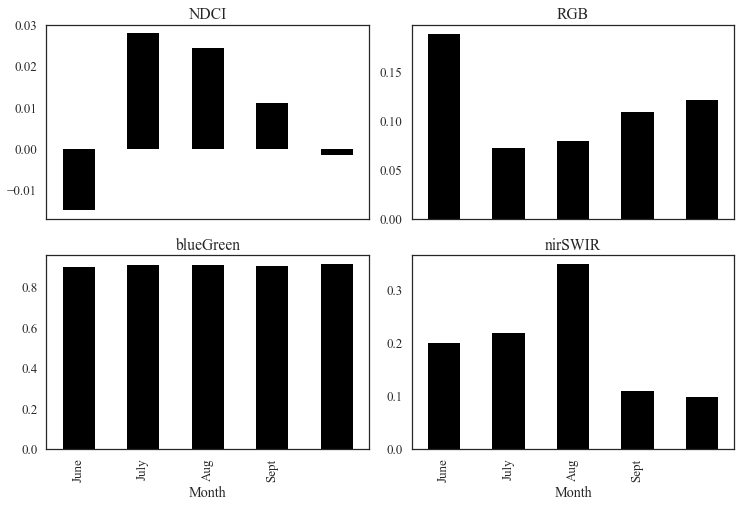

In [52]:
fig, ax = plt.subplots(2, 2)

result['NDCI'].plot(kind= 'bar', color ='black', ax=ax[0,0]) #no need to specify for first axis
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('NDCI')
ax[0, 0].set_xticklabels([])

result['RGB'].plot(kind= 'bar', color ='black', ax=ax[0, 1]) #no need to specify for first axis
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('RGB')
ax[0, 1].set_xticklabels([])


result['blueGreen'].plot(kind= 'bar', color ='black', ax=ax[1, 0]) #no need to specify for first axis
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_title('blueGreen')
labels = ['June','July', 'Aug', 'Sept']
ax[1, 0].set_xticklabels(labels)

result['nirSWIR'].plot(kind= 'bar', color ='black', ax=ax[1, 1]) #no need to specify for first axis
ax[1, 1].set_xlabel('Month')
ax[1, 1].set_title('nirSWIR')
ax[1, 1].set_xticklabels(labels)

plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('overall_alg_bar_l8.png', dpi = 300)

In [53]:
df2.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 15, 2016",Lake_1-46-3,NaN,RGB


/Users/ckuhn/Documents/ABOVE/Figures


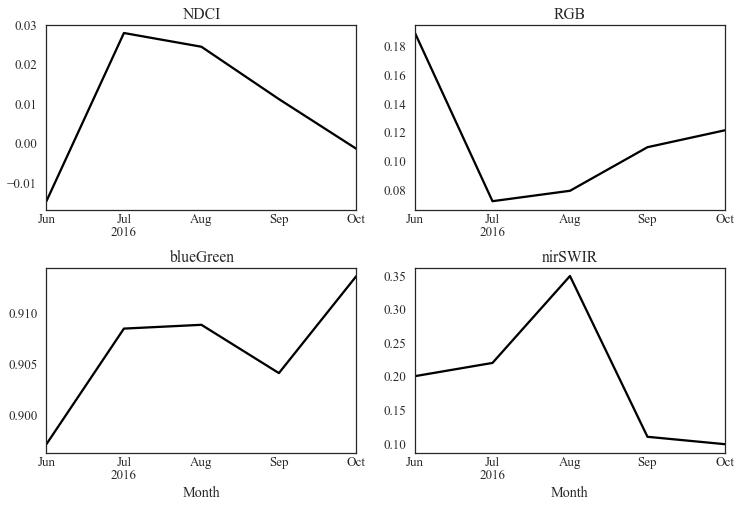

In [54]:
fig, ax = plt.subplots(2, 2)

result['NDCI'].plot(color ='black', ax=ax[0,0]) #no need to specify for first axis
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('NDCI')
ax[0, 0].set_xticklabels([])

result['RGB'].plot(color ='black', ax=ax[0, 1]) #no need to specify for first axis
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('RGB')
ax[0, 1].set_xticklabels([])


result['blueGreen'].plot(color ='black', ax=ax[1, 0]) #no need to specify for first axis
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_title('blueGreen')
labels = ['June','July', 'Aug', 'Sept']
ax[1, 0].set_xticklabels(labels)

result['nirSWIR'].plot(color ='black', ax=ax[1, 1]) #no need to specify for first axis
ax[1, 1].set_xlabel('Month')
ax[1, 1].set_title('nirSWIR')
ax[1, 1].set_xticklabels(labels)

plt.tight_layout()


%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('overall_line_line.png', dpi = 300)

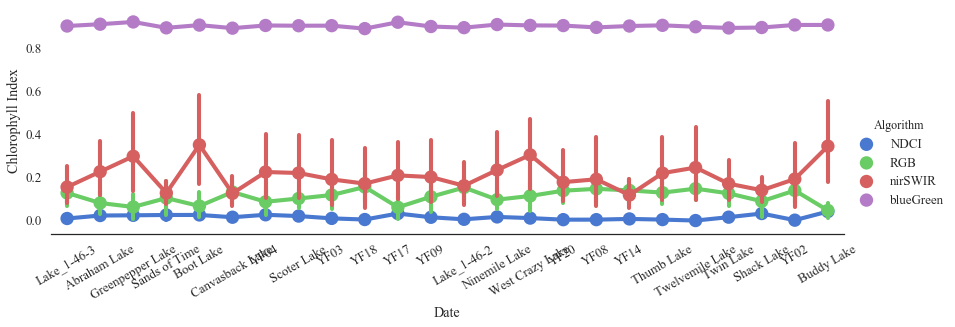

In [55]:
g = sns.factorplot(x="Lake", y="Reflectance", hue="Algorithm", data=boss,
                   palette="muted", size=4, aspect=3)

g.despine(left=True)
g.set_ylabels("Chlorophyll Index")
g.set_xlabels("Date")
g.set_xticklabels(rotation=30)

#plt.tight_layout()

/Users/ckuhn/Documents/ABOVE/Figures


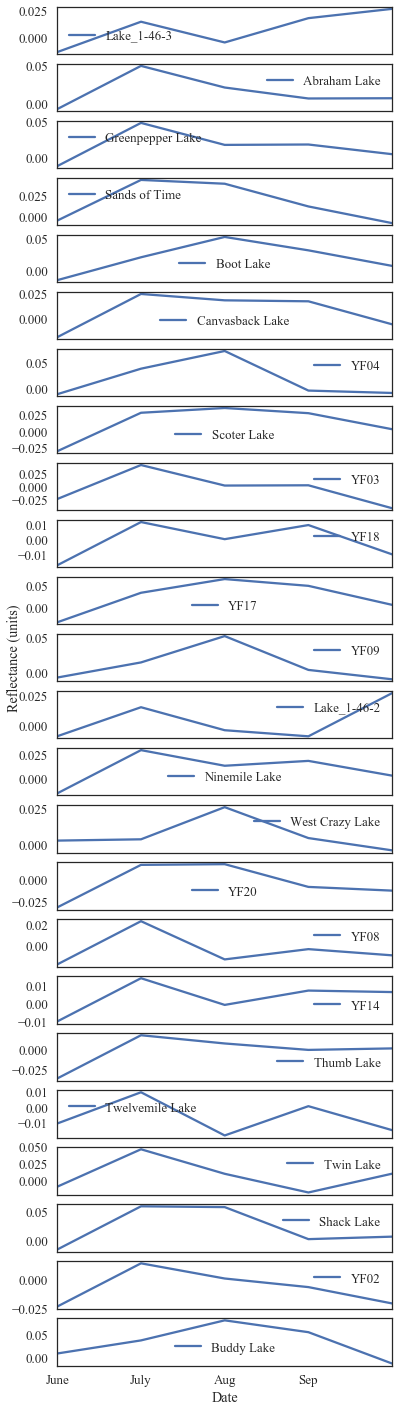

In [56]:
data = NDCI

#NDCI_raw = pd.read_csv('NDCI.csv', low_memory=False)
#rgb_raw = pd.read_csv('rgb.csv', low_memory=False)
#blueGreen_raw = pd.read_csv('blueGreen.csv', low_memory=False)
#nirSWIR_raw = pd.read_csv('nirSWIR.csv', low_memory=False)

fig, ax = plt.subplots(len(data.columns))
for idx in range(len(data.columns)):
    data[data.columns[idx]].plot(ax=ax[idx])

ax[idx//2].set_ylabel("Reflectance (units)")

# Retrieve an element of a plot and set properties
for idx in range(len(data.columns)):
    ax[idx].set_xticklabels('')
    ax[idx].legend()
    
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")

ax[idx].set_xticklabels(['June','', 'July','', 'Aug','', 'Sep'])

fig.set_size_inches([6, 25])

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('indv_TS_rgb.png', dpi = 300)

### Chla Index By Lake for Matt

/Users/ckuhn/Documents/ABOVE/Figures


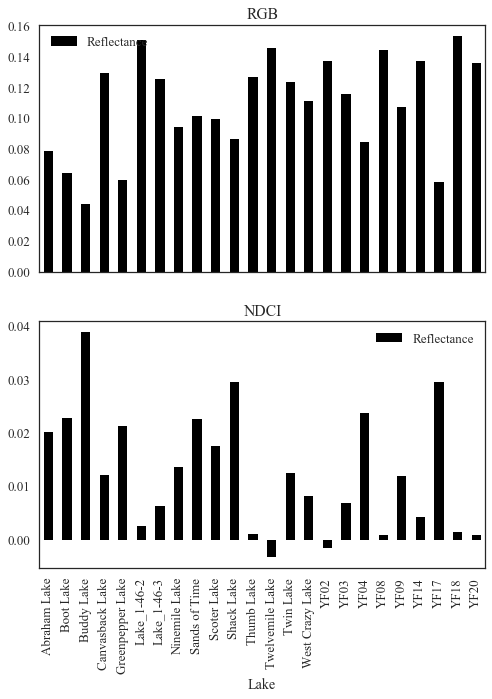

In [57]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

fig, ax = plt.subplots(2)

df2.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_title('RGB')
ax[0].set_xticklabels([])

df1.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[1])
#ax[1].set_xlabel('')
ax[1].set_title('NDCI')
#ax[1].set_xticklabels([])

fig.set_size_inches([8, 10])


#plt.tight_layout()
%cd /Users/ckuhn/Documents/ABOVE/figures
#plt.savefig('RGB_NCDI_L8_bar.png', dpi = 300)

In [58]:
g1 = df2.groupby(['Lake']).mean()
g2 = df1.groupby(['Lake']).mean()


g1 = g1.reset_index()
g2 = g2.reset_index()

g2

g2['RGB Chla Index'] = g2['Reflectance']
g1['NDCI Chla Index'] = g1['Reflectance']

concat = pd.concat([g1,g2])
concat = concat.drop('Reflectance')
print(concat)

# concat.to_csv('alg_results_for_matt.csv')

                Lake  NDCI Chla Index  RGB Chla Index  Reflectance
0       Abraham Lake         0.078545             NaN     0.078545
1          Boot Lake         0.064355             NaN     0.064355
2         Buddy Lake         0.044000             NaN     0.044000
3    Canvasback Lake         0.129818             NaN     0.129818
4   Greenpepper Lake         0.060121             NaN     0.060121
5        Lake_1-46-2         0.150935             NaN     0.150935
6        Lake_1-46-3         0.125581             NaN     0.125581
7      Ninemile Lake         0.094212             NaN     0.094212
8      Sands of Time         0.101767             NaN     0.101767
9        Scoter Lake         0.099692             NaN     0.099692
10        Shack Lake         0.086871             NaN     0.086871
11        Thumb Lake         0.127051             NaN     0.127051
12   Twelvemile Lake         0.145676             NaN     0.145676
13         Twin Lake         0.123688             NaN     0.12

In [64]:
df1

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 15, 2016",Lake_1-46-3,NaN,NDCI
1,"Jun 17, 2016",Lake_1-46-3,-0.024,NDCI
2,"Jun 17, 2016",Lake_1-46-3,-0.024,NDCI
3,"Jun 19, 2016",Lake_1-46-3,NaN,NDCI
4,"Jun 22, 2016",Lake_1-46-3,-0.012,NDCI
5,"Jun 24, 2016",Lake_1-46-3,-0.050,NDCI
6,"Jun 24, 2016",Lake_1-46-3,NaN,NDCI
7,"Jun 26, 2016",Lake_1-46-3,NaN,NDCI
8,"Jun 26, 2016",Lake_1-46-3,0.049,NDCI
9,"Jun 27, 2016",Lake_1-46-3,NaN,NDCI


In [98]:
# Not sure why this is giving me no values back?
juneMatchups1 = df1.loc[df1['system:time_start'] == 'Jun 24, 2016'] #| df1.loc[df1['system:time_start'] == '23-Sep-16']
juneMatchups2 = df1.loc[df1['system:time_start'] == 'Jun 27, 2016'] #| df1.loc[df1['system:time_start'] == '23-Sep-16']
juneMatchups3 = df1.loc[df1['system:time_start'] == 'Jul 1, 2016'] #| df1.loc[df1['system:time_start'] == '23-Sep-16']
juneMatchups4 = df1.loc[df1['system:time_start'] == 'Jun 29, 2016'] #| df1.loc[df1['system:time_start'] == '23-Sep-16']


## Sep 7 and June 29th has the best clear images

sepMatchups1 = df1.loc[df1['system:time_start'] == 'Sep 7, 2016']
sepMatchups2 = df1.loc[df1['system:time_start'] == 'Sep 14, 2016']
sepMatchups3 = df1.loc[df1['system:time_start'] == 'Sep 15, 2016']
sepMatchups4 = df1.loc[df1['system:time_start'] == 'Sep 16, 2016']
sepMatchups5 = df1.loc[df1['system:time_start'] == 'Sep 17, 2016']
sepMatchups6 = df1.loc[df1['system:time_start'] == 'Sep 21, 2016']


juneMatchups = juneMatchups1.append(juneMatchups2).append(juneMatchups3).append(juneMatchups4)
sepMatchups  = sepMatchups1.append(sepMatchups2).append(sepMatchups3).append(sepMatchups4).append(sepMatchups5).append(sepMatchups6)
exactMatchups = juneMatchups4.append(sepMatchups1)

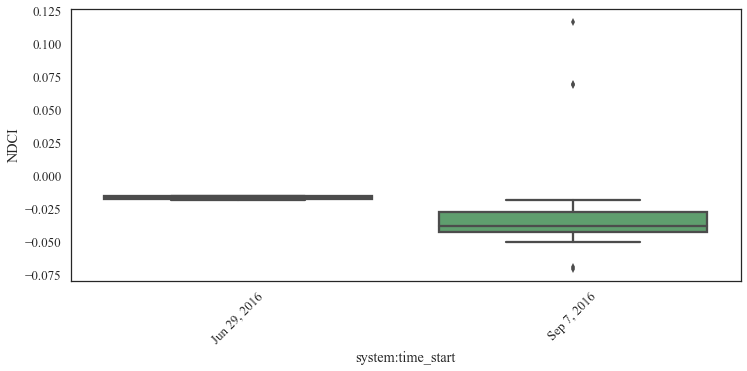

In [99]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(exactMatchups['system:time_start'], exactMatchups['Reflectance'],ax=ax)
ax.set_ylabel('NDCI')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

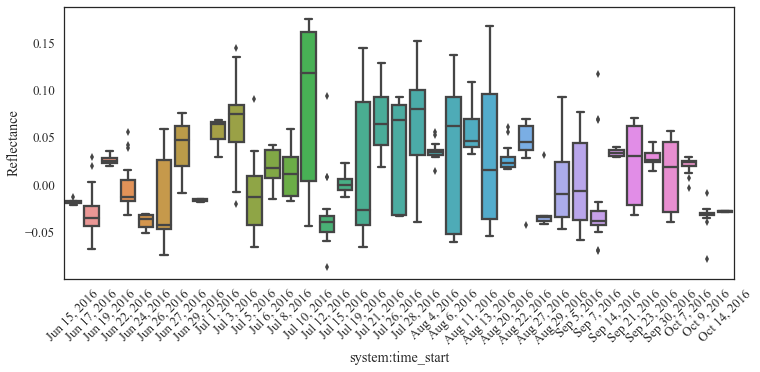

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df1['system:time_start'], df1['Reflectance'],ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)